In [4]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Prepare Data

### Load data

In [5]:
def load_cifar10(BATCH_SIZE=64, NUM_WORKERS=2):
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5),
                              (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data',
                                            train=True,
                                            download=True,
                                            transform=transform)

    # shuffle the data to make sure model is not seeing data in the same order every epoch
    trainloader = torch.utils.data.DataLoader(trainset,
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              num_workers=NUM_WORKERS)

    testset = torchvision.datasets.CIFAR10(root='./data',
                                           train=False,
                                           download=True,
                                           transform=transform)

    # shuffling on test data is not necessary
    testloader = torch.utils.data.DataLoader(testset,
                                             batch_size=BATCH_SIZE,
                                             shuffle=False,
                                             num_workers=NUM_WORKERS)




    return (trainloader, testloader)


train_loader, test_loader = load_cifar10(128, 4)

Files already downloaded and verified
Files already downloaded and verified


### Verify data

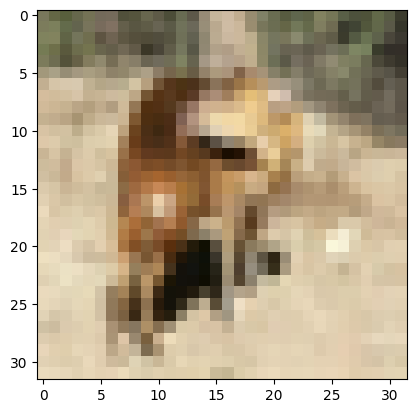

deer


In [6]:
def imshow(img):
    img = img / 2 + 0.5 # convert back to range [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def plot_images(n, imageloader, labels):
    dataiter = iter(imageloader)
    images, labels = next(dataiter)
    for i in range(n):
        imshow(torchvision.utils.make_grid(images[i]))
        print(class_names[labels[i]])

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plot_images(1, train_loader, class_names)

## Define the Convolutional Neural Network

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = CNN()

### Define the loss function and optimizer

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## Train the CNN

In [9]:
training_log = {'epoch':[], 'loss': []}

for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        training_log['epoch'].append(epoch)
        training_log['loss'].append(running_loss)


        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}')
            running_loss = 0.0

KeyboardInterrupt: 

In [ ]:
print('Finished Training')

plt.plot(training_log['epoch'], training_log['loss'])


### Test the CNN

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print(f'Accuracy of {class_names[i]}: {100 * class_correct[i] / class_total[i]}%')


NameError: name 'test_loader' is not defined

After initial training of 10 epochs, the result is as follows:

```text
Accuracy of the network on the 10000 test images: 41.21%
Accuracy of airplane: 55.172413793103445%
Accuracy of automobile: 39.285714285714285%
Accuracy of bird: 9.090909090909092%
Accuracy of cat: 8.823529411764707%
Accuracy of deer: 22.22222222222222%
Accuracy of dog: 39.39393939393939%
Accuracy of frog: 61.111111111111114%
Accuracy of horse: 56.0%
Accuracy of ship: 43.75%
Accuracy of truck: 41.02564102564103%
```